In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
data_path = '../data/testset.csv'
df = pd.read_csv(data_path)
df = df.iloc[3:, 6]
df = pd.to_numeric(df)
index = 0
output = []
while index in range(0, len(df.index)):
    temp=df.iloc[index:index+512]
    if len(temp)==512:
        output.append(temp.to_list())
    index = index+10

train = torch.tensor(output, dtype=torch.float32)
data_loader = torch.utils.data.DataLoader(dataset=train, batch_size=16, shuffle=True)

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(512, 128), 
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 8),
        )

        self.decoder = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 512)
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0)

In [5]:
num_epochs = 200
outputs = []
for epoch in range(num_epochs):
    for input in data_loader:
        recon = model(input)
        loss = criterion(recon, input)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch:{epoch+1}, Loss:{loss.item(): .4f}')
    outputs.append((epoch, input, recon))

Epoch:1, Loss: 0.5568
Epoch:2, Loss: 0.5053
Epoch:3, Loss: 0.3794
Epoch:4, Loss: 0.2027
Epoch:5, Loss: 0.0354
Epoch:6, Loss: 0.0185
Epoch:7, Loss: 0.0156
Epoch:8, Loss: 0.0156
Epoch:9, Loss: 0.0152
Epoch:10, Loss: 0.0152
Epoch:11, Loss: 0.0150
Epoch:12, Loss: 0.0152
Epoch:13, Loss: 0.0150
Epoch:14, Loss: 0.0149
Epoch:15, Loss: 0.0149
Epoch:16, Loss: 0.0149
Epoch:17, Loss: 0.0143
Epoch:18, Loss: 0.0150
Epoch:19, Loss: 0.0145
Epoch:20, Loss: 0.0149
Epoch:21, Loss: 0.0147
Epoch:22, Loss: 0.0146
Epoch:23, Loss: 0.0150
Epoch:24, Loss: 0.0150
Epoch:25, Loss: 0.0152
Epoch:26, Loss: 0.0150
Epoch:27, Loss: 0.0148
Epoch:28, Loss: 0.0147
Epoch:29, Loss: 0.0152
Epoch:30, Loss: 0.0158
Epoch:31, Loss: 0.0152
Epoch:32, Loss: 0.0150
Epoch:33, Loss: 0.0146
Epoch:34, Loss: 0.0151
Epoch:35, Loss: 0.0146
Epoch:36, Loss: 0.0148
Epoch:37, Loss: 0.0153
Epoch:38, Loss: 0.0149
Epoch:39, Loss: 0.0143
Epoch:40, Loss: 0.0147
Epoch:41, Loss: 0.0147
Epoch:42, Loss: 0.0149
Epoch:43, Loss: 0.0147
Epoch:44, Loss: 0.01

In [6]:
model.eval()

inf = model(train).detach()

l = []

for i, item in enumerate(train):
    l.append(criterion(item, inf[i]).item())

mn = np.mean(l)
std = np.std(l)
count = 0
for i, item in enumerate(l):
    if item > mn + 3*std and count < 10:
        count= count+1
        plt.figure()
        plt.plot(train[i])
        plt.plot(inf[i])
        



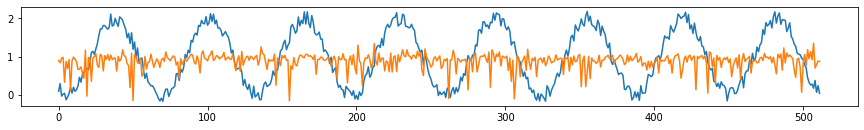

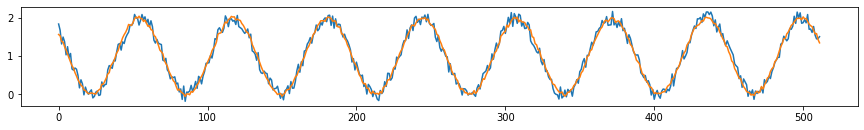

In [7]:
for k in range (0, num_epochs, 100):
    plt.figure(figsize=(15, 4))
    plt.gray()
    input = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(input):
        if i >= 1: break
        plt.subplot(2, 1, 1)
        plt.plot(item)
    
    for i, item in enumerate(recon):
        if i >= 1: break
        # plt.subplot(2, 1, 2)
        plt.plot(item)